In [3]:
import pandas as pd
import random 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer


In [4]:
data_df = pd.read_csv('newsCorpora.csv', sep='\t', header=None)
data_df.drop(data_df.columns[0], axis=1, inplace=True)
rows = list(range(len(data_df.index)))
random.shuffle(rows)
data_df = data_df.iloc[rows]
data_df = data_df.reset_index(drop=True)
data_df.head()

,1,2,3,4,5,6,7
0,PlayStation Finally Coming To China,http://www.justpushstart.com/2014/05/playstati...,Just Push Start,t,dEftysQ9yeuUWXMsEDcrJ5jHz_tMM,www.justpushstart.com,1401099893041
1,Time to celebrate Earth Day,http://www.examiner.com/article/time-to-celebr...,Examiner.com,t,dfr1ecd3D0rgvNMR9wodgydFf12SM,www.examiner.com,1398163098305
2,Adobe Creative Cloud for Photographers now per...,http://www.expertreviews.co.uk/photo-editing/1...,Expert Reviews,b,dx5rs7ln2b_Ad8MMGjFrLWi0Q-R6M,www.expertreviews.co.uk,1403115982957
3,IRS: largest phone scam we've seen,http://www.kfvs12.com/story/25042018/irs-large...,KFVS,b,dR39a35kcuso-9M3bXDszPvdbxY1M,www.kfvs12.com,1395503772056
4,Montana Data Breach Exposes 1.3M Personal Records,"http://www.pcmag.com/article2/0,2817,2460044,0...",PC Magazine,t,dGnQ1lzhziNKfwMNrNEePcbzqBL8M,www.pcmag.com,1403786215060


In [5]:
data_df.iloc[:, 3] = data_df.iloc[:, 3].astype('category')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422419 entries, 0 to 422418
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   1       422419 non-null  object  
 1   2       422419 non-null  object  
 2   3       422417 non-null  object  
 3   4       422419 non-null  category
 4   5       422419 non-null  object  
 5   6       422419 non-null  object  
 6   7       422419 non-null  int64   
dtypes: category(1), int64(1), object(5)
memory usage: 19.7+ MB


Text(0.5, 1.0, 'Distribution of news categories')

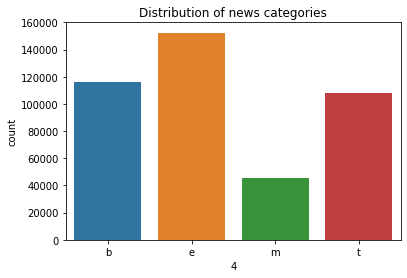

In [6]:
sns.countplot(x=data_df.iloc[:, 3], data=data_df)
plt.title('Distribution of news categories')

In [7]:
def data_processing(text):
    text = text.lower()
    text_tokens = word_tokenize(text)
    filtered_text = [word for word in text_tokens if word not in stop_words]
    stemmer = PorterStemmer()
    stemmed_text = [stemmer.stem(word) for word in filtered_text]
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word) for word in stemmed_text]
    return " ".join(lemmatized_text)


In [8]:
X = data_df.iloc[:, 0].apply(data_processing)
Y = data_df.iloc[:, 3]

In [9]:
data = pd.DataFrame()
data['title'] = X
data['category'] = Y
data.category.replace({'b': 0, 't': 1, 'e': 2, 'm': 3}, inplace=True)
data['word_count'] = data['title'].apply(lambda x: len(str(x).split(" ")))
data.head()

,title,category,word_count
0,playstat final come china,1,4
1,time celebr earth day,1,4
2,adob creativ cloud photograph perman,0,5
3,ir : largest phone scam 've seen,0,7
4,montana data breach expo 1.3m person record,1,7


In [10]:
duplicate_count = data.duplicated().sum()
print("Number of duplicate rows: ", duplicate_count)

Number of duplicate rows:  21082


In [11]:
data = data.drop_duplicates('title')
data.shape

(400350, 3)

In [12]:
X = data['title']
Y = data['category']
vect = TfidfVectorizer()
X = vect.fit_transform(X)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)
# x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
print(x_train)

  (0, 19105)	0.37336547948801807
  (0, 40510)	0.35605811366286316
  (0, 18807)	0.36328022573564406
  (0, 39493)	0.39998222297764235
  (0, 37811)	0.3977964654592705
  (0, 9449)	0.3970894975401958
  (0, 14229)	0.3548808818804349
  (1, 13610)	0.4188871334151136
  (1, 28281)	0.3428782550540564
  (1, 9417)	0.33605012148699304
  (1, 20391)	0.33499354561939104
  (1, 17437)	0.2932058243025959
  (1, 31639)	0.35941526379813543
  (1, 5614)	0.29591285481068846
  (1, 27313)	0.3107331636350657
  (1, 8628)	0.2873137797450104
  (2, 34491)	0.4915764968168791
  (2, 34978)	0.4800731708281193
  (2, 14966)	0.4716256812602034
  (2, 20219)	0.40879639742628326
  (2, 13088)	0.3719368503596029
  (3, 8467)	0.5741974489687304
  (3, 15497)	0.36690321654949937
  (3, 5305)	0.39646635660607926
  (3, 22924)	0.41230057903146106
  :	:
  (320277, 29537)	0.4134934896018088
  (320277, 31105)	0.4022748596256626
  (320277, 23345)	0.35456623241921603
  (320277, 29515)	0.3120607454181122
  (320277, 29217)	0.30630221224222426
 

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [15]:
# logreg = LogisticRegression()
# ovr = OneVsRestClassifier(logreg)
# ovr.fit(x_train, y_train)
# ovr_pred = ovr.predict(x_test)
# ovr_acc = accuracy_score(y_test, ovr_pred)
# print("test accuracy: {}".format(ovr_acc))

In [16]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
clf.fit(x_train, y_train)
clf_pred = clf.predict(x_test)
clf_acc = accuracy_score(y_test, clf_pred)
print("test accuracy: {}".format(clf_acc))

test accuracy: 0.9407018858498813


In [17]:
print(classification_report(y_test, clf_pred))
print("\n")
print(confusion_matrix(y_test, clf_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     21879
           1       0.93      0.92      0.92     20656
           2       0.96      0.98      0.97     28877
           3       0.95      0.91      0.93      8658

    accuracy                           0.94     80070
   macro avg       0.94      0.93      0.94     80070
weighted avg       0.94      0.94      0.94     80070



[[20209  1121   383   166]
 [ 1116 19036   408    96]
 [  338   249 28170   120]
 [  359   149   243  7907]]


In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.916 total time=   5.9s
[CV 2/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.916 total time=   5.6s
[CV 3/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.915 total time=   5.8s
[CV 4/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.916 total time=   5.6s
[CV 5/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.915 total time=   5.5s
[CV 1/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.916 total time=   5.6s
[CV 2/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.916 total time=   5.5s
[CV 3/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.915 total time=   5.5s
[CV 4/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.916 total time=   5.3s
[CV 5/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.915 total time=   5.6s
[CV 1/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.907 total time=   2.6s
[CV 2/5] END C=0.1, penalty=l2, solver=li

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=3)

In [29]:
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.95
Best parameters:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [36]:
clf = LogisticRegression(random_state=0, multi_class='multinomial', C=10, penalty='l2')
clf.fit(x_train, y_train)
clf_pred = clf.predict(x_test)
clf_acc = accuracy_score(y_test, clf_pred)
print("test accuracy: {}".format(clf_acc))

test accuracy: 0.9418383914075185


In [37]:
print(classification_report(y_test, clf_pred))
print("\n")
print(confusion_matrix(y_test, clf_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     21879
           1       0.92      0.92      0.92     20656
           2       0.97      0.97      0.97     28877
           3       0.96      0.91      0.94      8658

    accuracy                           0.94     80070
   macro avg       0.94      0.93      0.94     80070
weighted avg       0.94      0.94      0.94     80070



[[20317  1135   290   137]
 [ 1184 19087   309    76]
 [  375   301 28100   101]
 [  399   155   195  7909]]
